## 7.5.3 Exercise

## Two continuous variables

1. Instead of summarising the conditional distribution with a boxplot, you could use a frequency polygon. What do you need to consider when using cut_width() vs cut_number()? How does that impact a visualisation of the 2d distribution of carat and price?

In [3]:
library(tidyverse)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


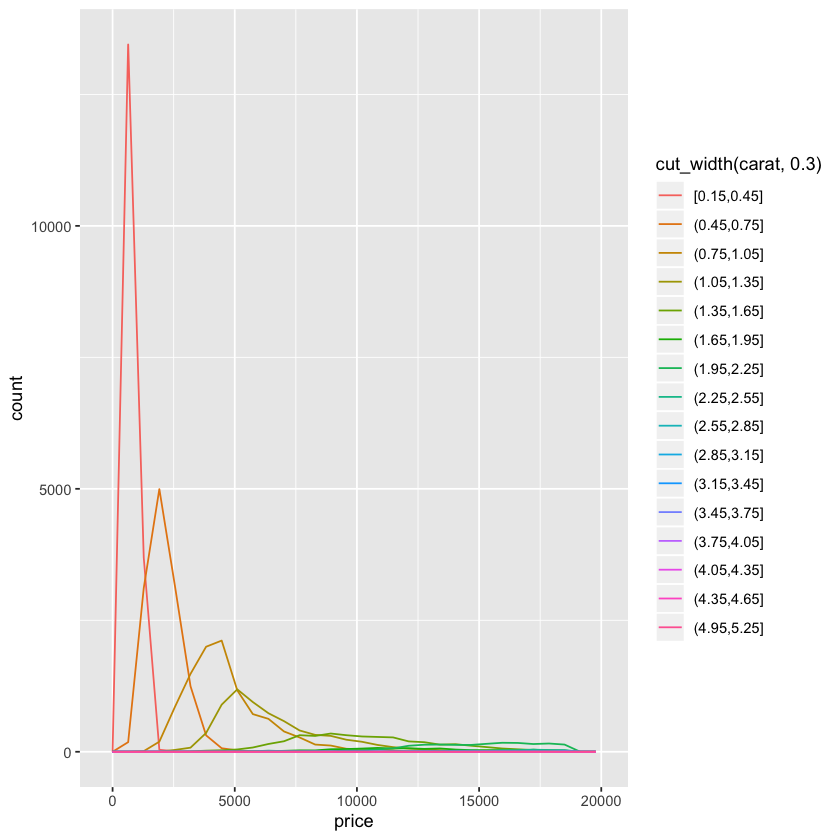

In [4]:
ggplot(data = diamonds, 
       mapping = aes(x = price,
                     colour = cut_width(carat, 0.3))) +
  geom_freqpoly()

So cut_number makes N groups having the same number of observation in each group.
Here there's no contextual or substantive reason for different coding.

cut_width is more substancial. You make groups based on the metric of the variables.

In fact, there's a tension between the two. The idea is that you reach an equilibrium
between the two; categoris which have substantial meaning but also have reasonable sample sizes.

Here we get 10 groups with the same sample size.

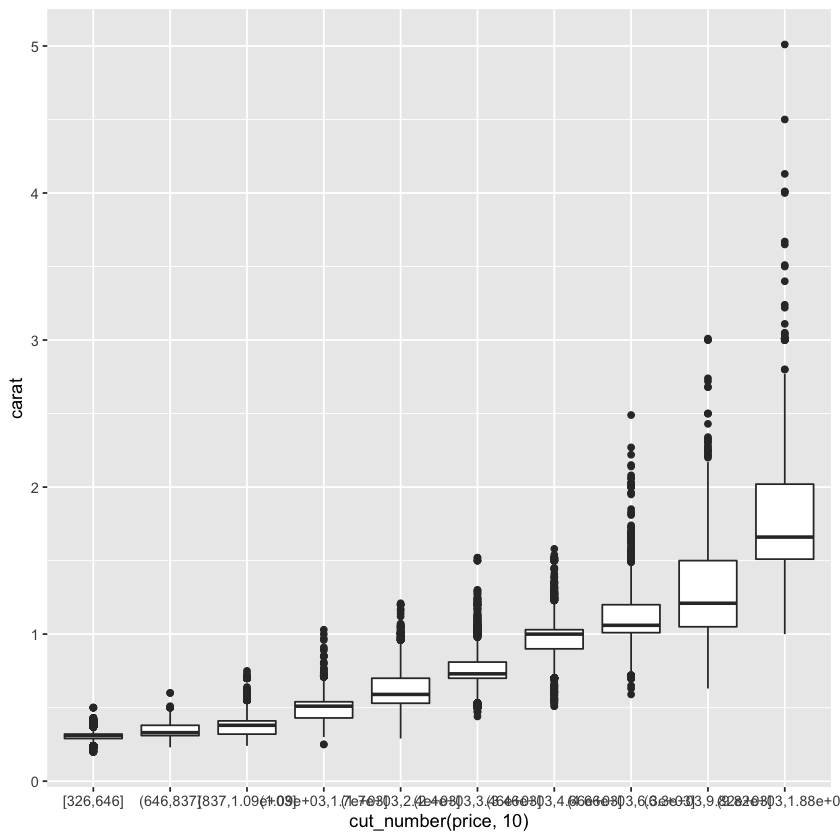

In [5]:
ggplot(data = diamonds, aes(x=cut_number(price, 10), y=carat)) +
  geom_boxplot()

The relationship seems a bit exponential with little differences between the smaller groups.

But with 10 groups based on substantive metrics:

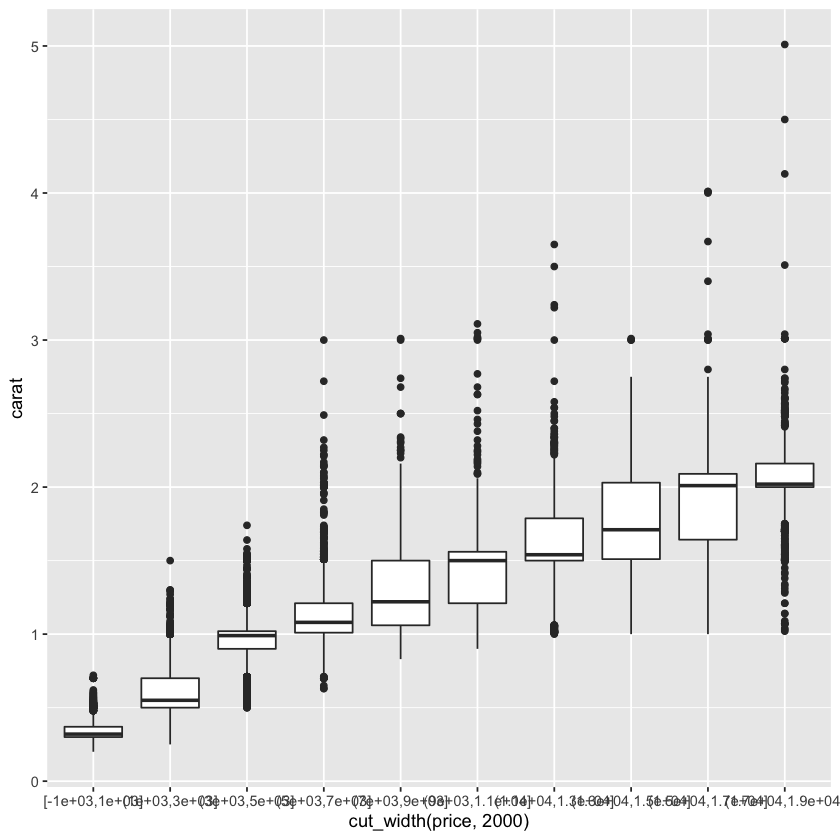

In [6]:
ggplot(data = diamonds, aes(x=cut_width(price, 2000), y=carat)) +
  geom_boxplot()

There are bigger differences between the bottom group. But that's because the bottom groups now
contain many more observations which captures the variability between groups (so within each of
these groups the variance is small, that's why in the previous plot we see very little difference
in the small groups).

2. Visualize the distribution of cara, partitioned by price.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


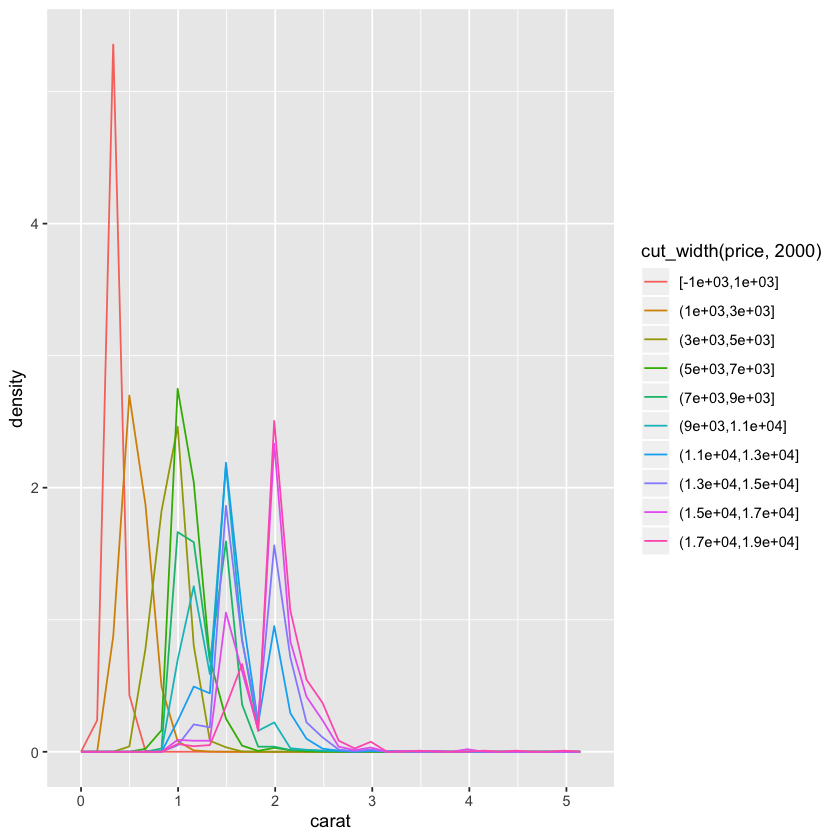

In [7]:
ggplot(diamonds, aes(carat, y = ..density.., colour = cut_width(price, 2000))) +
  geom_freqpoly()

3. How does the price distribution of very large diamonds compare to small diamonds. Is it as you expect, or does it surprise you?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


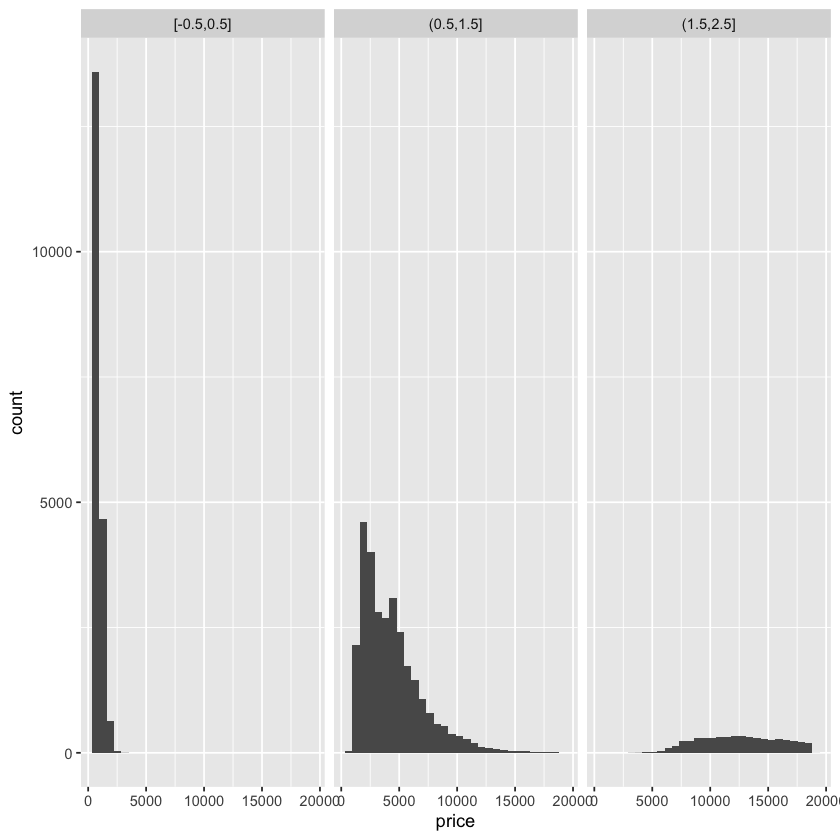

In [9]:
diamonds %>%
  filter(between(carat, 0, 2.5)) %>%
  mutate(carat = cut_width(carat, 1)) %>%
  ggplot(aes(price)) +
           geom_histogram() +
           facet_wrap(~ carat)

I'm a bit surprised with the distribution of price for bigger diamonds. I was expecting very little variance! It seems as though big diamonds can cost anything between 5000 and 18000. Whereas small ones have very little variance.

4. Combine two of the techniques you've learned to visualize the combined distribution of cut, carat and price.

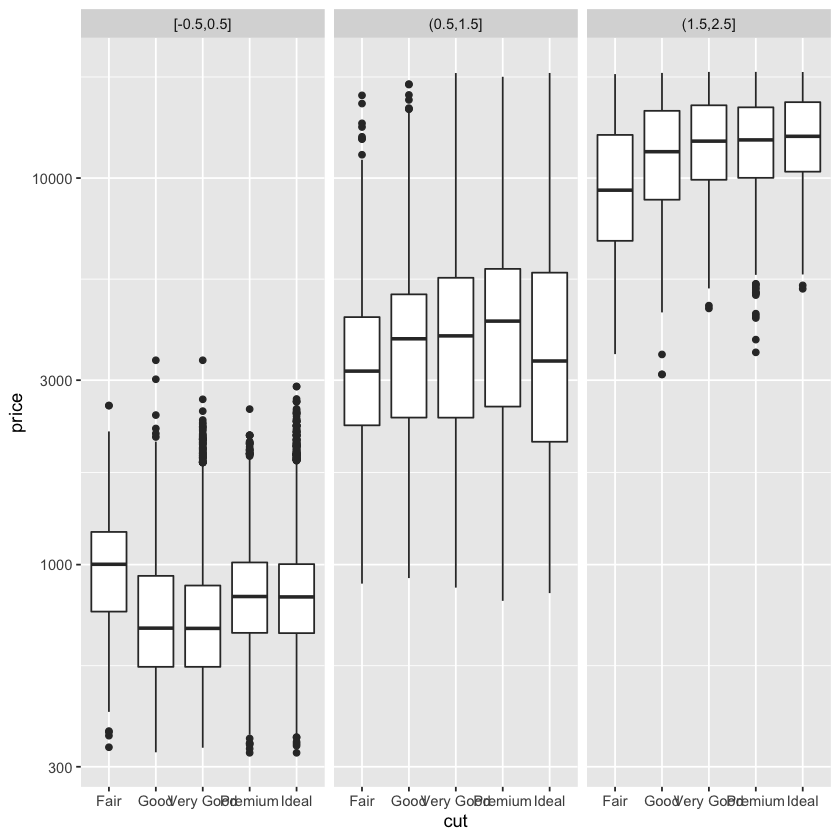

In [10]:
diamonds %>%
  filter(between(carat, 0, 2.5)) %>%
  mutate(carat = cut_width(carat, 1)) %>%
  ggplot(aes(cut, price)) +
  geom_boxplot() +
  scale_y_log10() +
  facet_wrap(~ carat)

We get the differences in price we saw before for carat groups but we also see that within each carat groups the differences between the cut in terms of prices is very little. It seems the be that the driving force of price is more carat rather than the cut.

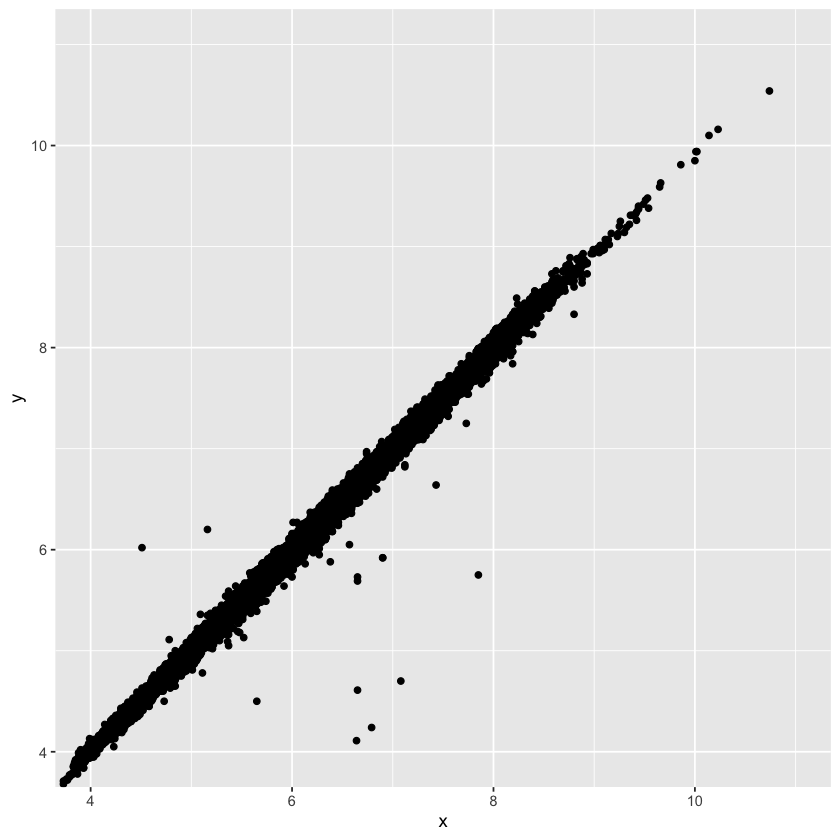

In [11]:
ggplot(data = diamonds) +
  geom_point(mapping = aes(x = x, y = y)) +
  coord_cartesian(xlim = c(4, 11), ylim = c(4, 11))

Why is a scatterplot a better display than a binned plot for this case?

Because binned plots tend to categorize continuous measures and might distort some relationships, like a linear one here.

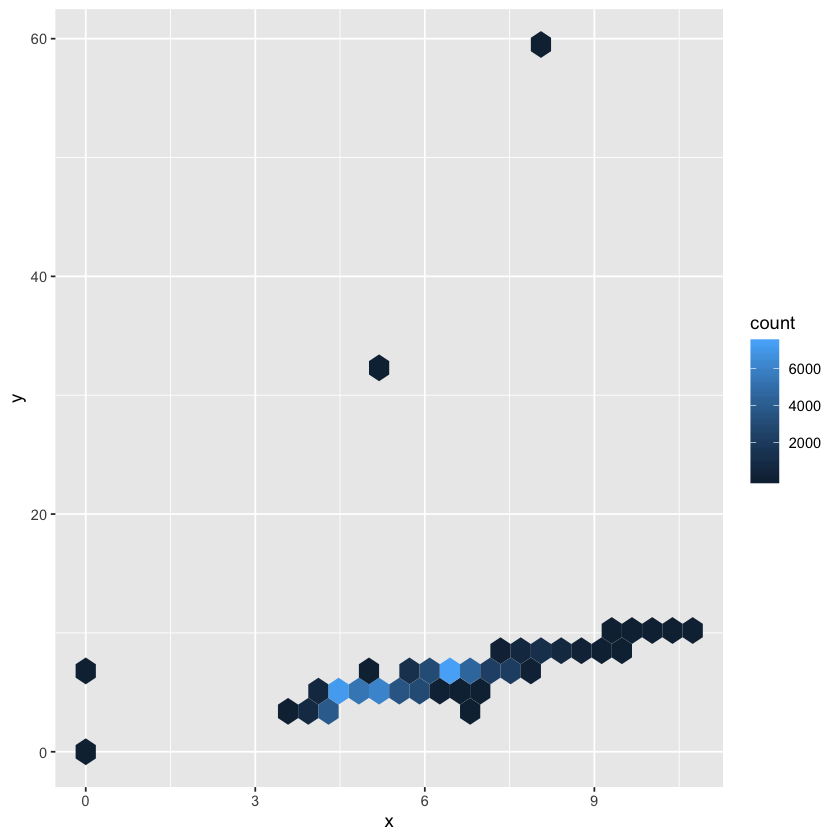

In [12]:
ggplot(diamonds, aes(x, y)) +
  geom_hex()

Another possibility would be to bin both continuous variables, as stated before, but that would categorize outliers into groups, eliminating any trace of anomalous or extreme values.